# Return Period for Cyclones using ECMWF Forecasts

This notebook looks at the return period for STS, TC, ITC using ECMWF forecasts.

In [2]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.datasources import rsmc, ecmwf

In [5]:
save_dir = rsmc.DATA_DIR / "public" / "exploration" / "moz" / "ecmwf_hindcast"

In [6]:
# Load all cyclone CSV files
ecmwf_cyclone_data = ecmwf.load_all_cyclone_csvs(save_dir)
ecmwf_cyclone_data["lat"] = ecmwf_cyclone_data["lat"].apply(
    lambda x: -x if x > 0 else x
)
interpolated_ecmwf_data = ecmwf.interpolate_cyclone_tracks(ecmwf_cyclone_data)

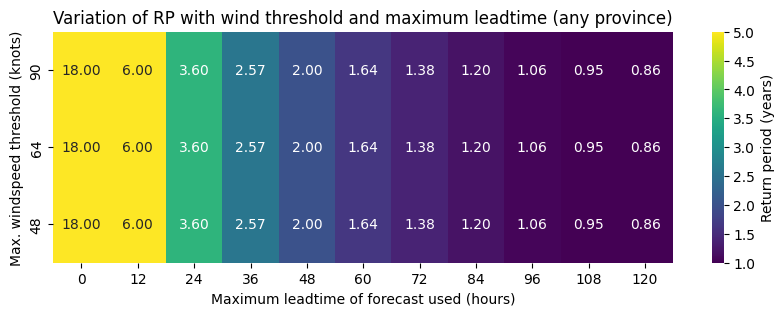

In [11]:
wind_threshs = [48, 64, 90]

dicts = []
for max_lt in range(0, 121, 12):
    for wind_thresh in wind_threshs:
        rp = ecmwf.calculate_rp(
            ecmwf_cyclone_data,
            max_lt=max_lt,
            wind_thresh=wind_thresh,
            by_total_storms=False,
        )
        dicts.append(
            {
                "wind_thresh": wind_thresh,
                "max_lt": max_lt,
                "rp": rp,
            }
        )
df_rps = pd.DataFrame(dicts)

heatmap_data = df_rps.pivot(index="wind_thresh", columns="max_lt", values="rp")

fig, ax = plt.subplots(figsize=(10, 3))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    ax=ax,
    vmax=5,
    vmin=1,
    cmap="viridis",
    cbar_kws={"label": "Return period (years)"},
)

ax.set_xlabel("Maximum leadtime of forecast used (hours)")
ax.set_ylabel("Max. windspeed threshold (knots)")
ax.set_title(
    "Variation of RP with wind threshold and maximum leadtime (any province)"
)
ax.invert_yaxis()

plt.show()